# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Load haberman into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
print("The shape of data set:", haberman.shape)
print("\nThe numbers of features:", haberman.shape[1])
print("\nThe numbers of data points:", haberman.shape[0])
print("\nThe columns names in dataset\n", haberman.columns)

The shape of data set: (306, 4)

The numbers of features: 4

The numbers of data points: 306

The columns names in dataset
 Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [3]:
print("The features count")
haberman.count()

The features count


age       306
year      306
nodes     306
status    306
dtype: int64

**Observation(s)** - All the features have equal number of 306 datapoints and no data points are missing.

In [4]:
print("The data-points per class")
haberman["status"].value_counts()

The data-points per class


1    225
2     81
Name: status, dtype: int64

**Observation(s)** -  Data set is imbalanced. The data for the patient survived 5 years or longer(1) is more compared to the patient died within 5 years(2).

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

The given dataset is a classification problem. There are two labels - 1 corresponds to the patient who survived 5 years or longer and 2 corresponds to the patient who died within 5 years. The feature "age" gives information about the age of the patient at the time of operation, feature "nodes" number of positive axillary nodes detected (numerical), and features "year" patient's year of operation (year - 1900, numerical).

The task is to find out which all are features or combination of features are useful for classifying the patient survival status.


### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

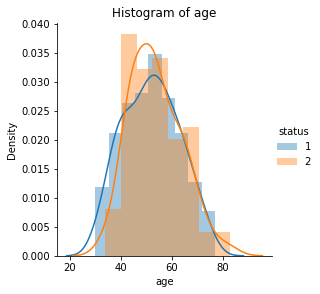

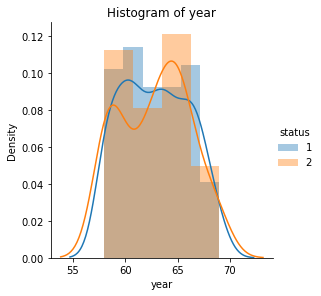

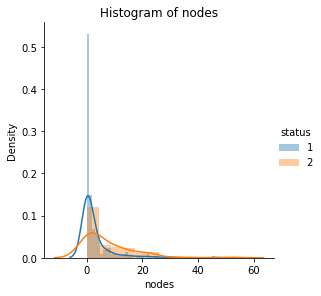

In [5]:
#for loop for getting the histogram 
features = ["age","year","nodes"]
for feat in features:
    sns.FacetGrid(haberman, hue="status", size=4) \
       .map(sns.distplot, feat) \
       .add_legend()
    plt.title('Histogram of '+ feat)
    plt.show()

**Observation(s)**

*Histogram of age* - Most of the survival and death occurred between 40 to 70 years. 

*Histogram of year* - The year of operation and patient survival status clearly overlap each other. There is no clear picture of classification between patients.

*Histogram of nodes* - There is more survival at node 1. But still, there are deaths at these nodes. 

In [6]:
#seaparating the dataframe based on the status
haberman_status_1 = haberman[haberman["status"] == 1]
haberman_status_2 = haberman[haberman["status"] == 2]

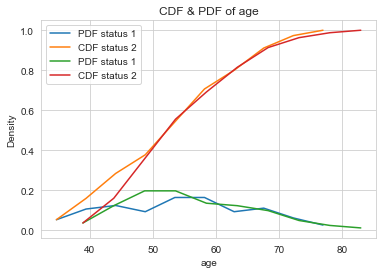

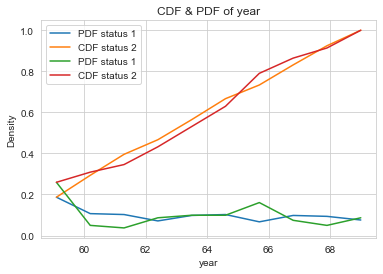

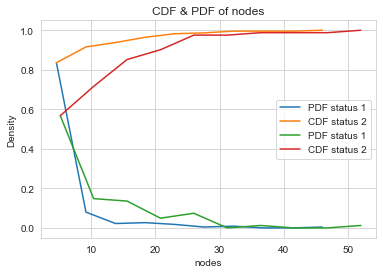

In [7]:
#for loop to get CDF and PDF
#code taken from the reference notebook.
features = ["age","year","nodes"]
for feat in features:
    counts, bin_edges = np.histogram(haberman_status_1[feat], bins=10,density = True)
    pdf = counts/(sum(counts))
    sns.set_style("whitegrid")
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label = "PDF status 1")
    plt.plot(bin_edges[1:], cdf,label = "CDF status 2")
    plt.legend()
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.title('CDF & PDF of '+ feat)
    
    counts, bin_edges = np.histogram(haberman_status_2[feat], bins=10,density = True)
    pdf = counts/(sum(counts))
    sns.set_style("whitegrid")
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label = "PDF status 1")
    plt.plot(bin_edges[1:], cdf,label = "CDF status 2")
    plt.legend()
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.title('CDF & PDF of '+ feat)
    plt.show()

**Observation**

1. Nearly 80%+ of survivlas and nearly 60% of non survivals are having only 1 node
2. PDF of nodes is having a kind of Power law distritution.

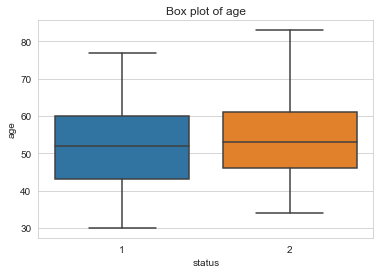

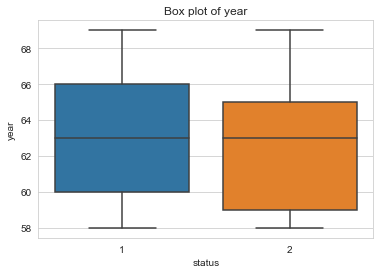

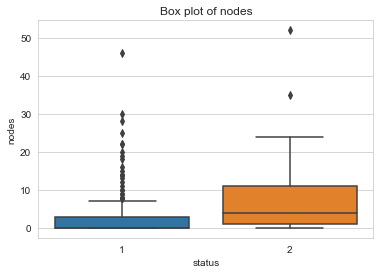

In [8]:
#for loop for printing the box plot
for feat in features:
    sns.boxplot(x='status',y=feat , data=haberman)
    plt.title('Box plot of '+ feat)
    plt.show()

**Observations**

The box plot is a visual representation of the distribution of numerical data and skewlness through displaying the quartiles. It also provides information about the outliers in the data set.

Box plot of age - The interquartile range for the survival is 42 to 60 and nonsurvival patient is 48 to 62

Box plot of years - The plots for both status looks the same with the interquartile range of 1960 to 1966 and 1959 to 1965 for survival and non survival patients respectively. 
 
Box plot of nodes -There are a lot of outliers in the surviving patient and the interquartile range is very narrow. Coming to the non survived patient after 5 years the range is quite wide. We can use this feature for classification. But the range is overlapping each other.


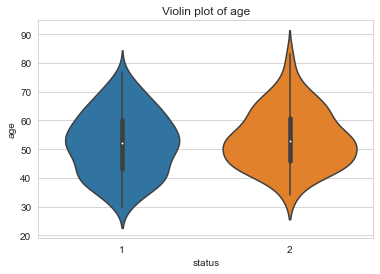

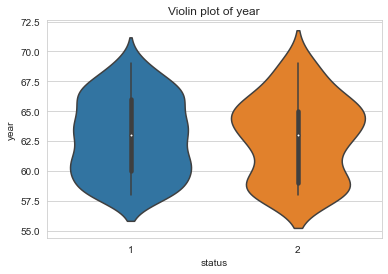

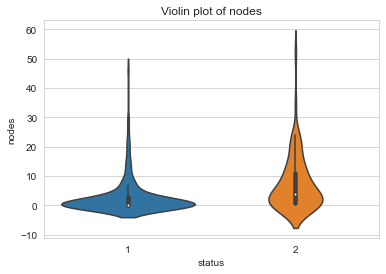

In [9]:
#for loop to print the violin plot
for feat in features:
    sns.violinplot(x="status", y=feat, data=haberman, size=8)
    plt.title('Violin plot of '+ feat)
    plt.show()

**Observations**

The violin plot is an extension of the box plot in addition to the kernel density distributions.

Violin plot of age - The distribution for survival follows Gaussian structure. Still, it is not symmetric. The distribution for status two shows skewness with the tail. Both distributions overlap.

Violin plot of year - The distributions are overlapping each other.

Violin plot of nodes - The distributions are like log-normal with long tails. Status 1 has a patient with more survivals with fewer nodes. Still, the distribution is overlapping

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


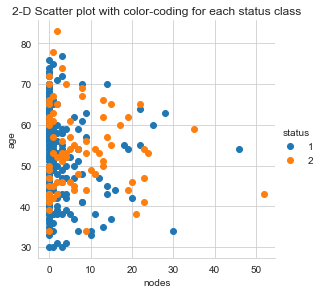

In [10]:
#code is taken from the reference notebook.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend()
plt.title('2-D Scatter plot with color-coding for each status class')
plt.show()

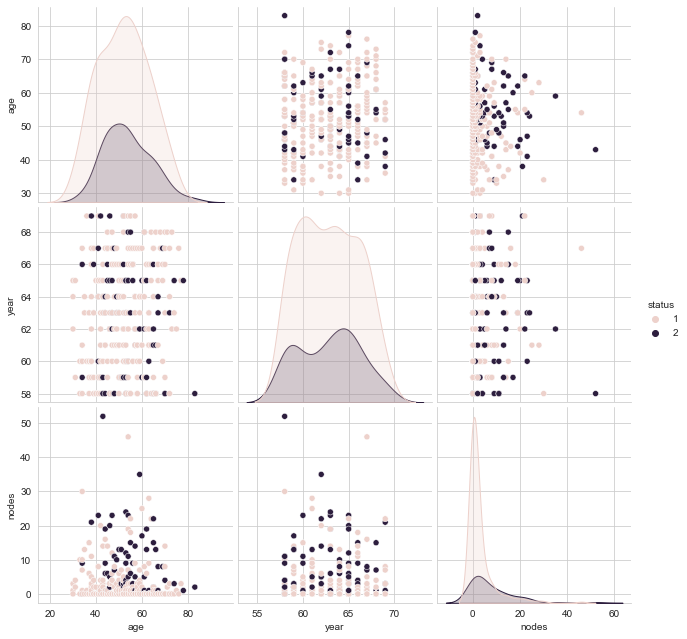

In [11]:
#code taken from the refernce notebook
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status", height=3)
plt.show()

**Observation**

1. Feature or combination of features are not lineraly separable.

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

The given dataset is a classification problem. There are two labels - 1 corresponds to the patient who survived 5 years or longer and 2 corresponds to the patient who died within 5 years. The feature "age" gives information about the age of the patient at the time of operation, feature "nodes" number of positive axillary nodes detected (numerical), and features "year" patient's year of operation (year - 1900, numerical).

The task is to find out which all are features or combination of features are useful for classifying the patient survival status.

Major Observations are:
1. Data set is imbalance with 225 status-1 and 81 status-2 datapoints. 
2. Most of the survival and death occurred between 40 to 70 years
3. Nearly 80%+ of survivlas and nearly 60% of non survivals are having only 1 node and PDF of nodes is having a kind of Power law distritution.
4. Number of nodes among survivals are comparatively less than non survivals.The interquartile range for the survival is 0 to 3 and for non survivals it is 0 to 11.
5. Feature or combination of features are not lineraly separable.